In [2]:
import torch
import torch.nn as nn
import json

from fut_network import *
from fut_graphics import *
from fut_data import FutData, f as fut

from fut import classify_validity

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [4]:
def load_boundary_points(i: int) -> ndarray:
    with open(f"../../.data/boundaries/boundary_{i}.json") as f:
        data = json.load(f)
    return np.array(data["boundary_points"])

In [5]:
def load(i: int) -> nn.Module:
    network = nn.Sequential(ConcreteLinear(2, 50), nn.ReLU(), ConcreteLinear(50, 1))
    state = torch.load(f"../../.models/bnn_expl/ensemble/network_{i}.model")
    network.load_state_dict(state)
    return network

In [6]:
def combine(networks, n: int = 100, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    
    dataset = FutData(2**10)
    A, B = np.meshgrid(np.linspace(0, 1, n), np.linspace(0, 1, n))
    A = A.flatten()
    B = B.flatten()
    x = torch.tensor(np.vstack((A, B)).T, dtype=torch.float32)
    
    image = torch.zeros((n, n))#, dtype=torch.bool)
    
    for net in networks:
        y_cls = classify_validity(net, dataset, x).reshape((n, n))#.type(torch.bool)
        image += y_cls
    
    
    ax.imshow(np.flip(image.detach().numpy(), 0))
    ax.set_title("Validity Graph")

In [7]:
skip_list = [1, 2, 4, 7, 9, 11, 12, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 294, 295, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 999]
len(skip_list)

963

In [8]:
def get_abs_index(ensemble_i: int, max_i: int, skip_list: list[int]) -> int:
    i = 0
    skip_i = 0
    for j in range(max_i):
        if j == skip_list[skip_i]:
            skip_i += 1
        else:
            i += 1
            
        if i == ensemble_i:
            return j
    return None

In [9]:
n_nets = 1000
networks = []
for i in [x for x in range(n_nets) if x not in skip_list]:
    networks.append(load(i))

C:\Users\johnt\AppData\Local\Temp\ipykernel_29476\2810635575.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(f"../../.models/bnn_expl/ensemble/network

In [40]:
len(networks)
n_nets - len(skip_list), len(networks)

(37, 37)

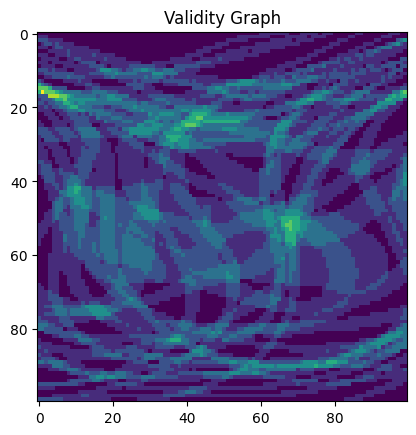

In [10]:
combine(networks)

C:\Users\johnt\AppData\Local\Temp\ipykernel_29476\2810635575.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(f"../../.models/bnn_expl/ensemble/network

37

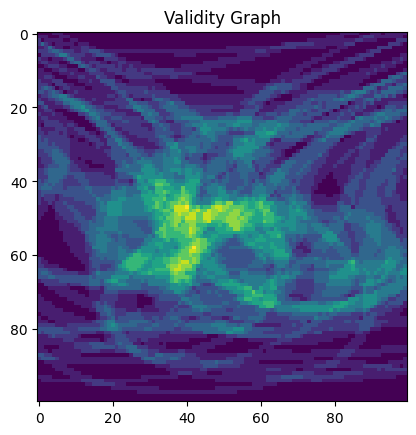

In [12]:
rng = np.random.default_rng()
rand_net = []
rand_skip_list = rng.choice(np.arange(1000), len(skip_list), replace=False)#np.random.randint(0, 100, len(skip_list))
for i in [x for x in range(1000) if x not in rand_skip_list]:
    rand_net.append(load(i))
    
combine(rand_net)
len(rand_net)

In [18]:
# testing performance
dataset = FutData(2**16)

ensemble = lambda x: np.array([model(x).detach() for model in networks]).mean()

# truth = fut(dataset)

In [22]:
x, y = dataset

truth = fut(*x.T)
pred = ensemble(x)
mse = ((truth - pred) ** 2).mean()
mse

tensor(4.3826)

In [ ]:
rand_ensemble = lambda x: np.array([model(x).detach() for model in rand_net]).mean()

truth = fut(*x.T)
pred = rand_ensemble(x)
mse = ((truth - pred) ** 2).mean()
mse

tensor(5.4188)

# Testing MSE Comparison

In [25]:
# Randomly selecting ensemble and averaging their MSE
rng = np.random.default_rng()
num_attempts = 20

mse = []

for i in range(num_attempts):
    rand_net = []
    rand_skip_list = rng.choice(np.arange(1000), len(skip_list), replace=False)
    for i in [x for x in range(1000) if x not in rand_skip_list]:
        rand_net.append(load(i))
    
    rand_ensemble = lambda x: np.array([model(x).detach() for model in rand_net]).mean()

    truth = fut(*x.T)
    pred = rand_ensemble(x)
    mse.append(((truth - pred) ** 2).mean())

np.array(mse).mean()
        

C:\Users\johnt\AppData\Local\Temp\ipykernel_29476\2810635575.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(f"../../.models/bnn_expl/ensemble/network

np.float32(2.0835366)